In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [16]:
df = pd.read_csv(r'..\data\processed\Canada.csv')

df

,Year,"Population, male (% of total population)","Population, male","Population, female (% of total population)","Population, female","Population, total",Population growth (annual %),"Age dependency ratio, young (% of working-age population)","Age dependency ratio, old (% of working-age population)",Age dependency ratio (% of working-age population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Refugee population by country or territory of asylum,Net migration,"Physicians (per 1,000 people)","Mortality rate, under-5, male (per 1,000 live births)","Mortality rate, under-5, female (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",Number of neonatal deaths,Number of under-five deaths,Number of infant deaths
0,1961,50.518259,9230191,49.481741,9040809,18271000,1.999185,57.997443,13.148538,71.145981,...,55.546,44492,24186,1.1000,35.2,27.7,31.5,NaN,14726,12582
1,1962,50.448813,9390542,49.551192,9223459,18614000,1.859888,58.088118,13.163742,71.251860,...,52.370,12282,26210,1.2000,34.0,26.8,30.5,NaN,14127,12032
2,1963,50.381390,9554327,49.618610,9409673,18964000,1.862846,57.859900,13.143824,71.003724,...,50.662,10946,40913,1.3000,32.8,25.7,29.4,NaN,13490,11460
3,1964,50.321204,9724573,49.678790,9600426,19325000,1.885715,57.306955,13.112797,70.419752,...,48.539,10178,58965,1.3000,31.6,24.8,28.2,NaN,12758,10804
4,1965,50.268043,9891746,49.731957,9786254,19678000,1.810167,56.439516,13.088879,69.528395,...,47.892,9980,103588,1.3000,30.2,23.9,27.1,NaN,11684,9818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2017,49.632517,18138320,50.367480,18406915,36545236,1.199521,24.124458,25.023597,49.148056,...,8.054,104768,361274,2.6102,5.6,4.9,5.3,1299.0,1962,1712
57,2018,49.657362,18405543,50.342638,18659541,37065084,1.412456,24.098516,25.703142,49.801657,...,7.094,114101,417974,2.4280,5.6,4.9,5.2,1275.0,1941,1697
58,2019,49.679793,18680213,50.320210,18921018,37601230,1.436137,24.052564,26.424826,50.477390,...,6.888,101757,391914,2.4350,5.5,4.8,5.2,1251.0,1897,1659
59,2020,49.689062,18885404,50.310938,19121762,38007166,1.073796,24.001803,27.253896,51.255699,...,6.985,109214,195181,2.4330,5.5,4.7,5.1,1271.0,1878,1645


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 86 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           61 non-null     int64  
 1   Population, male (% of total population)                       61 non-null     float64
 2   Population, male                                               61 non-null     int64  
 3   Population, female (% of total population)                     61 non-null     float64
 4   Population, female                                             61 non-null     int64  
 5   Population, total                                              61 non-null     int64  
 6   Population growth (annual %)                                   61 non-null     float64
 7   Age dependency ratio, young (% of working-age population)      6

In [18]:
df.head()

,Year,"Population, male (% of total population)","Population, male","Population, female (% of total population)","Population, female","Population, total",Population growth (annual %),"Age dependency ratio, young (% of working-age population)","Age dependency ratio, old (% of working-age population)",Age dependency ratio (% of working-age population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Refugee population by country or territory of asylum,Net migration,"Physicians (per 1,000 people)","Mortality rate, under-5, male (per 1,000 live births)","Mortality rate, under-5, female (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",Number of neonatal deaths,Number of under-five deaths,Number of infant deaths
0,1961,50.518259,9230191,49.481741,9040809,18271000,1.999185,57.997443,13.148538,71.145981,...,55.546,44492,24186,1.1,35.2,27.7,31.5,NaN,14726,12582
1,1962,50.448813,9390542,49.551192,9223459,18614000,1.859888,58.088118,13.163742,71.251860,...,52.370,12282,26210,1.2,34.0,26.8,30.5,NaN,14127,12032
2,1963,50.381390,9554327,49.618610,9409673,18964000,1.862846,57.859900,13.143824,71.003724,...,50.662,10946,40913,1.3,32.8,25.7,29.4,NaN,13490,11460
3,1964,50.321204,9724573,49.678790,9600426,19325000,1.885715,57.306955,13.112797,70.419752,...,48.539,10178,58965,1.3,31.6,24.8,28.2,NaN,12758,10804
4,1965,50.268043,9891746,49.731957,9786254,19678000,1.810167,56.439516,13.088879,69.528395,...,47.892,9980,103588,1.3,30.2,23.9,27.1,NaN,11684,9818


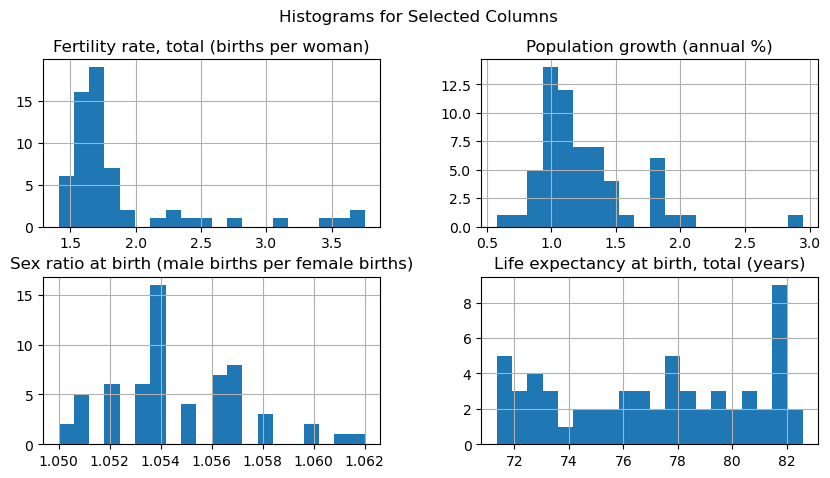

In [19]:
columns_of_interest = ["Fertility rate, total (births per woman)", "Population growth (annual %)", "Sex ratio at birth (male births per female births)", "Life expectancy at birth, total (years)"]
df_selected = df[columns_of_interest]

df_selected.hist(figsize=(10, 5), bins=20)
plt.suptitle('Histograms for Selected Columns')
plt.show()


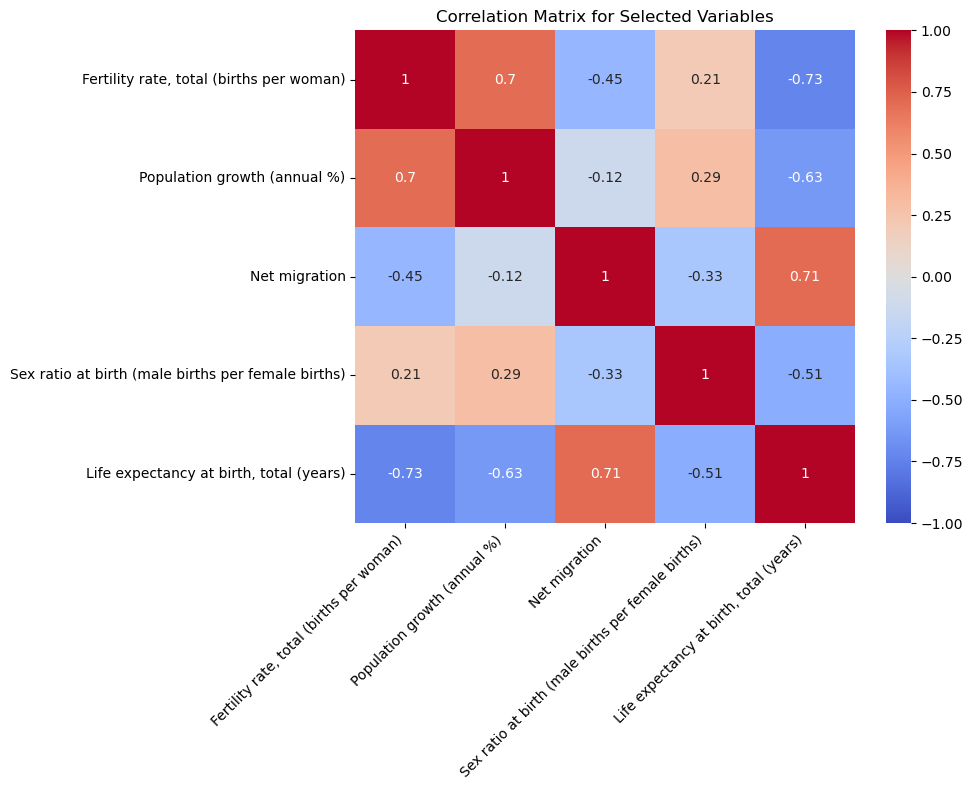

In [20]:
relevant_columns = [
    'Fertility rate, total (births per woman)', 
    'Population growth (annual %)', 
    'Net migration',
    'Sex ratio at birth (male births per female births)',
    'Life expectancy at birth, total (years)'
]
df_selected = df[relevant_columns]

correlation_matrix = df_selected.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Selected Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [21]:
# Load the data, skipping the first three rows
df = pd.read_csv(r'..\data\raw\raw_data.csv', skiprows=3)

# Filter rows based on the 'Indicator Name' column
filtered_df = df[df['Indicator Name'].isin([
    'Population growth (annual %)', 
    'Fertility rate, total (births per woman)', 
    'Net migration'
])]

# Select only the relevant columns
df_selected = filtered_df[['Country Name', 'Indicator Name', '2021.0']]

# Pivot the DataFrame to have 'Country Name' as the index
df_pivot = df_selected.pivot_table(index='Country Name', columns='Indicator Name', values='2021.0')

# Reset the index to make 'Country Name' a column again
df_pivot = df_pivot.reset_index()

print(df_pivot.head())

Indicator Name                 Country Name  \
0                               Afghanistan   
1               Africa Eastern and Southern   
2                Africa Western and Central   
3                                   Albania   
4                                   Algeria   

Indicator Name  Fertility rate, total (births per woman)  Net migration  \
0                                               4.643000      -183672.0   
1                                               4.354709      -179444.0   
2                                               4.978662      -264802.0   
3                                               1.390000       -10612.0   
4                                               2.889000       -18797.0   

Indicator Name  Population growth (annual %)  
0                                   2.851358  
1                                   2.607472  
2                                   2.573377  
3                                  -0.926918  
4                              

In [22]:
df_pivot

Indicator Name,Country Name,"Fertility rate, total (births per woman)",Net migration,Population growth (annual %)
0,Afghanistan,4.643000,-183672.0,2.851358
1,Africa Eastern and Southern,4.354709,-179444.0,2.607472
2,Africa Western and Central,4.978662,-264802.0,2.573377
3,Albania,1.390000,-10612.0,-0.926918
4,Algeria,2.889000,-18797.0,1.657703
...,...,...,...,...
252,Uzbekistan,3.173000,-39201.0,1.975706
253,"Venezuela, RB",2.211000,-525116.0,-1.025179
254,Viet Nam,1.944000,-992.0,0.844182
255,Virgin Islands (U.S.),2.010000,-224.0,-0.395928


In [23]:
print(df_pivot.columns)

Index(['Country Name', 'Fertility rate, total (births per woman)',
       'Net migration', 'Population growth (annual %)'],
      dtype='object', name='Indicator Name')


In [24]:
df_pivot.to_csv(r'../data/processed/pivot_table.csv', index=False)

In [25]:
import plotly.express as px
import pandas as pd

# Load the dataset
df = pd.read_csv(r'../data/processed/pivot_table.csv')

# Create the choropleth map
fig = px.choropleth(
    df,
    locations='Country Name',  # Column containing country names
    locationmode='country names',  # Use country names to match locations
    color='Fertility rate, total (births per woman)',  # Column to represent color scale
    hover_name='Country Name',  # Column to show when hovering over a country
    color_continuous_scale='Viridis',  # Color scale
    title='Fertility Rate by Country in 2021'  # Title of the map
)

# Show the plot
fig.show()

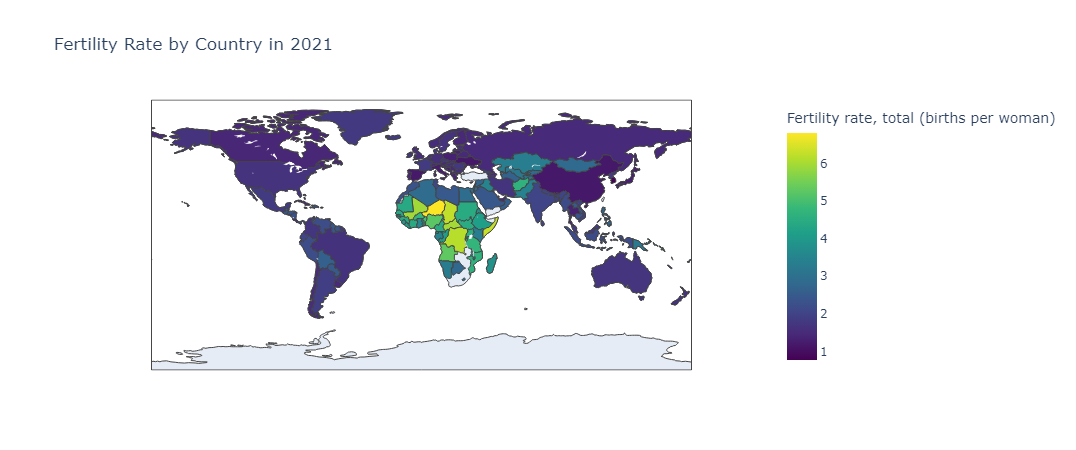

In [26]:
# Create the choropleth map
fig = px.choropleth(
    df,
    locations='Country Name',  # Column containing country names
    locationmode='country names',  # Use country names to match locations
    color='Population growth (annual %)',  # Column to represent color scale
    hover_name='Country Name',  # Column to show when hovering over a country
    color_continuous_scale='Viridis',  # Color scale
    title='Population growth (annual %) by Country in 2021'  # Title of the map
)

# Show the plot
fig.show()

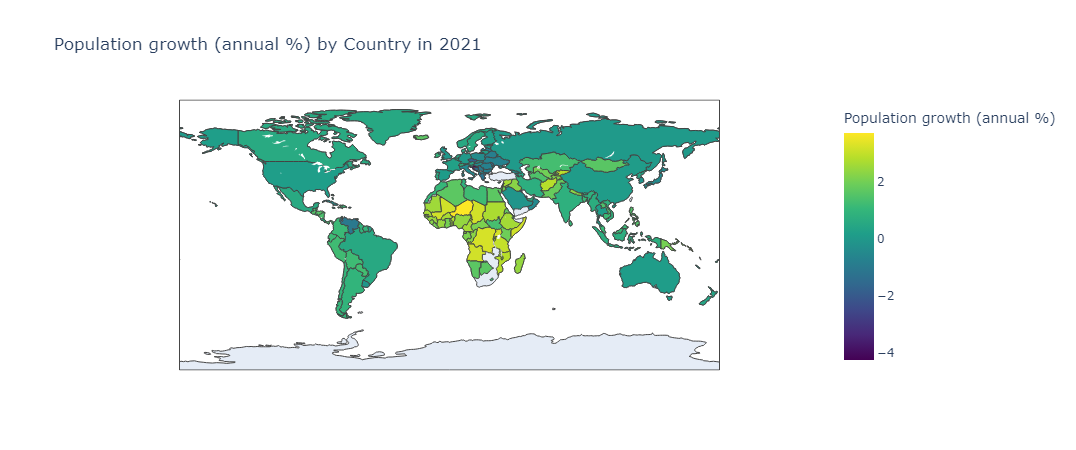

Fertility Rate by Country in 2021:

This map shows the fertility rate, which is the average number of births per woman in different countries.
The color scale ranges from purple (low fertility rate) to yellow (high fertility rate).
The map highlights regions in Africa with higher fertility rates (more than 5 births per woman), shown in yellow and green. In contrast, countries in Europe, North America, and East Asia show lower fertility rates (1-2 births per woman), represented by purple shades.

Population Growth (Annual %) by Country in 2021:

This map represents the annual percentage growth in population for different countries.
The color scale ranges from purple (negative growth) to yellow (positive growth).
The map shows that many African countries have high population growth rates (indicated by yellow shades), while some countries in Eastern Europe, Japan, and parts of the Caribbean are experiencing negative population growth (indicated by purple shades).


Overall Interpretation:

Fertility Rate: The map visually demonstrates global disparities in fertility rates, with many countries in Africa having significantly higher fertility rates compared to countries in Europe and East Asia. This suggests that these regions might experience different population dynamics in the coming years.
Population Growth: The population growth map provides insights into where the global population is expanding or contracting. High population growth in many African countries could lead to increased economic and social demands in these regions, while negative growth in other regions may raise concerns about aging populations and labor shortages.
These visualizations provide a clear and accessible way to understand and communicate the differences in fertility rates and population growth across the world, making them suitable for analyses that involve comparing these metrics at a global scale.

Fertility Rate represents the average number of children born to a woman over her lifetime in a specific country. Higher fertility rates are typically found in African countries, while lower rates are seen in more developed regions like Europe, North America, and East Asia.
Population Growth Rate represents the annual percentage change in population, which can be influenced by birth rates, death rates, and migration patterns. Regions with high fertility rates, particularly in Africa, also show higher population growth rates.

From these maps, it's evident that countries with higher fertility rates, primarily in Africa and some parts of Asia, generally show higher population growth rates. This supports the positive relationship observed in TP-1 between fertility rate and population growth, extending the insight beyond Canada to a global context.

Anomalies: There may be exceptions where high fertility rates do not correspond to high population growth, possibly due to factors like high mortality rates, emigration, or other socio-political factors. Conversely, some countries with moderate fertility rates might show positive population growth due to favorable migration policies.

The significant positive relationship between fertility rate and population growth in Canada, as observed in TP-1, appears to align with global trends where countries with higher fertility rates tend to have higher population growth. However, the degree of correlation may vary depending on other contributing factors specific to each country.